## Семинар 8: "Снижение размерности"

ФИО: Евстифеев Степан Александрович

In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
%matplotlib inline

Этот семинар посвящен снижению размерности на примере данных Olivetti faces. В данных содержатся 400 черно-белых изображений 64x64. Требуется исследовать различные способы снижения размерности: PCA и Автокодировщик

In [2]:
X = fetch_olivetti_faces()['data']

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/s.evstifeev/scikit_learn_data


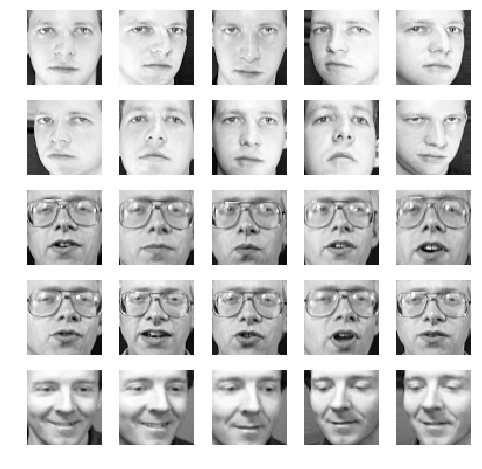

In [3]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(64, 64), cmap=plt.cm.Greys_r)
    plt.axis('off')
plt.show()

### Часть 1: PCA

In [4]:
from sklearn.decomposition import PCA

<i> 1.1 Примените алгоритм PCA к данным и отобразите главные компоненты. В качестве числа компонент выберите 25</i>

Подсказка: используйте метод <b>.components_</b>

In [5]:
X.shape

(400, 4096)

In [6]:
model = PCA(n_components=25)
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
principle_components = model.components_

In [8]:
principle_components.shape

(25, 4096)

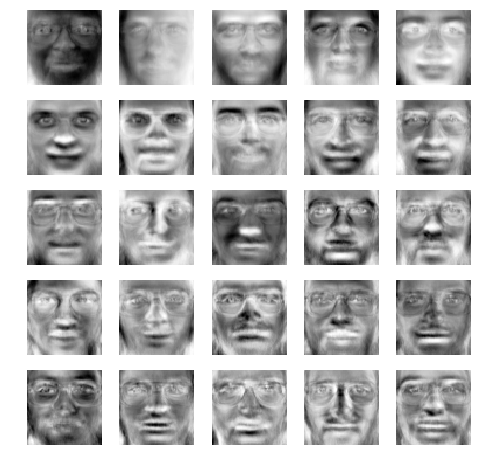

In [9]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(principle_components[i].reshape(64, 64), cmap=plt.cm.Greys_r)
    plt.axis('off')
plt.show()

<i> 1.2 Отобразите зависимость качества восстановления от количества компонент</i>

Подсказка: используйте метод <b>.explained\_variance\_ratio\_</b>

In [10]:
model = PCA()
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'Reconstruction quality (MSE)')

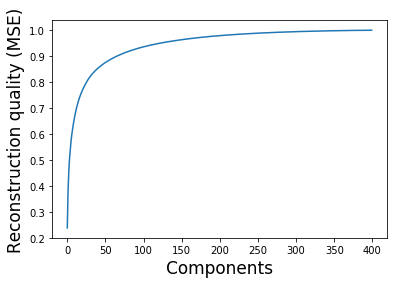

In [11]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.
plt.xlabel('Components', fontsize=17)
plt.ylabel('Reconstruction quality (MSE)', fontsize=17)

In [12]:
model = PCA(n_components=122)
model.fit(X)
embedding = model.transform(X)
reconstruction = model.inverse_transform(embedding)

Text(0.5,1,'Error')

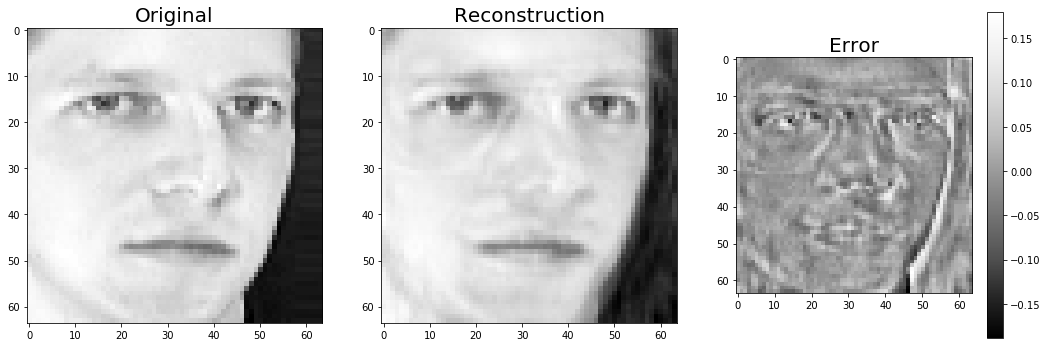

In [13]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow((X)[1].reshape(64, 64), cmap=plt.cm.Greys_r)
plt.title('Original', fontsize=20)
plt.subplot(1, 3, 2)
plt.imshow((reconstruction)[1].reshape(64, 64), cmap=plt.cm.Greys_r)
plt.title('Reconstruction', fontsize=20)
plt.subplot(1, 3, 3)
plt.imshow((reconstruction - X)[1].reshape(64, 64), cmap=plt.cm.Greys_r)
plt.colorbar()
plt.title('Error', fontsize=20)

<i>1.3 Какое количество компонент следует выбирать, чтобы соблюсти баланс размерность — качество?</i>

In [16]:
X.shape

(400, 4096)

Number of components 50. RMSE: 0.04936394840478897


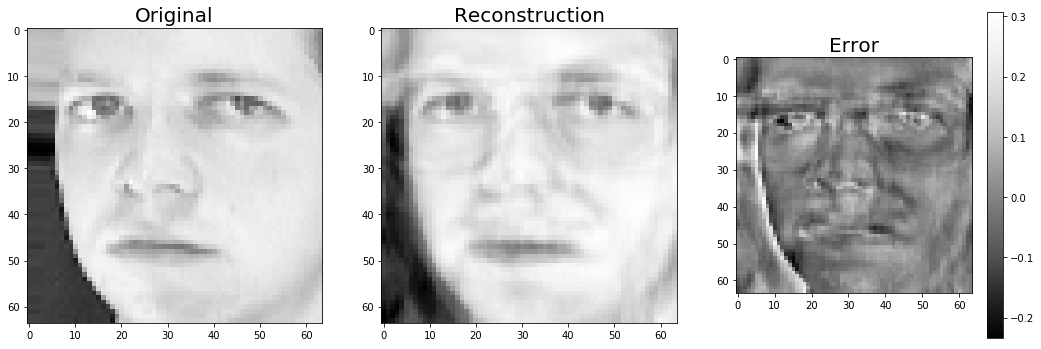

Number of components 100. RMSE: 0.035382043570280075


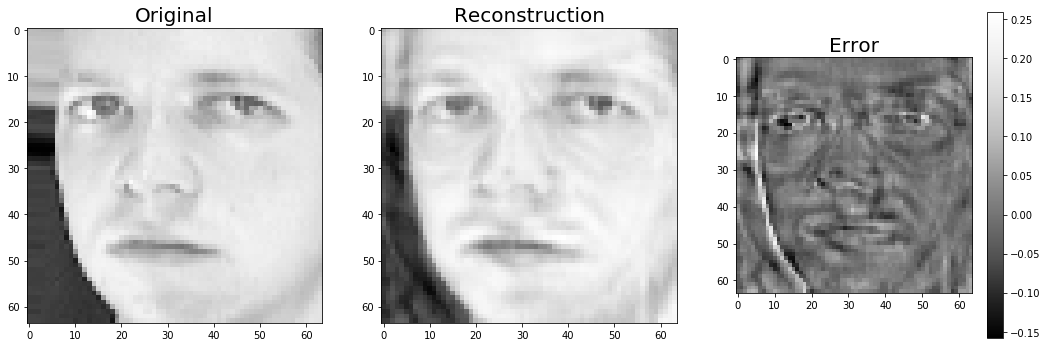

Number of components 200. RMSE: 0.02021835930645466


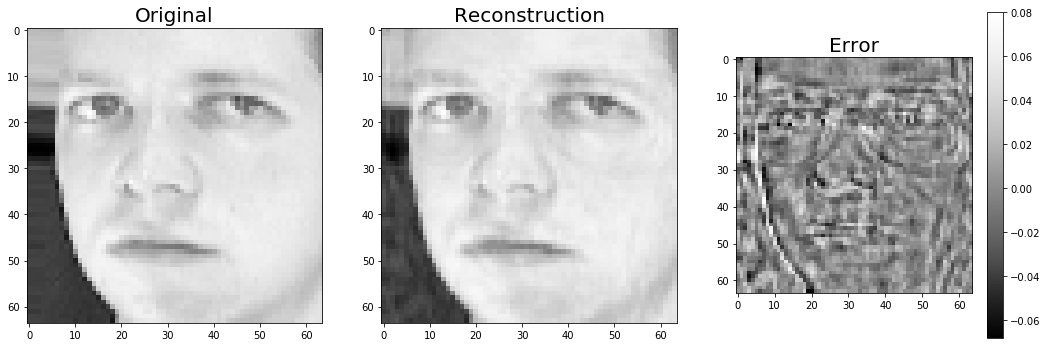

Number of components 300. RMSE: 0.010369101539254189


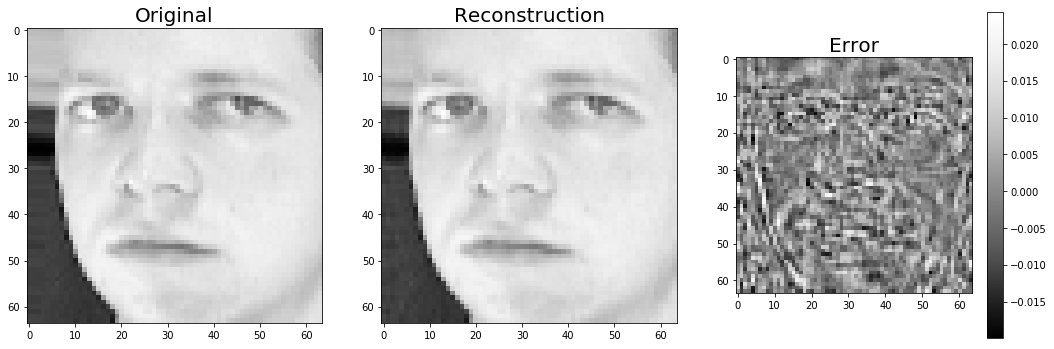

Number of components 500. RMSE: 1.559847930820979e-07


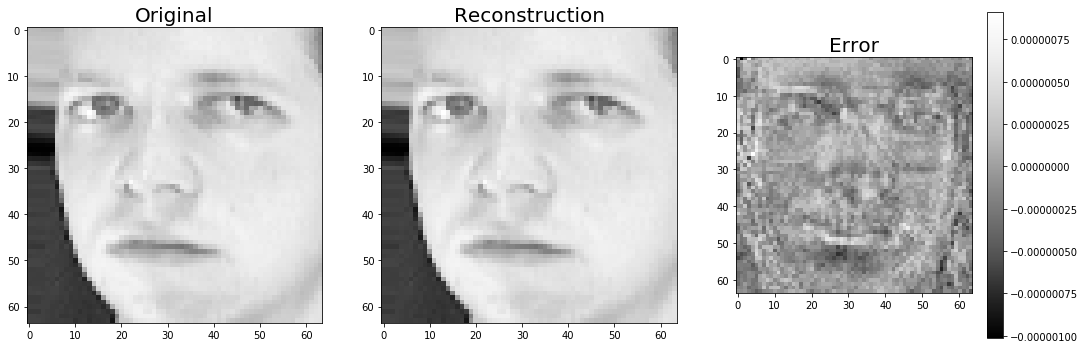

Number of components 700. RMSE: 1.559847930820979e-07


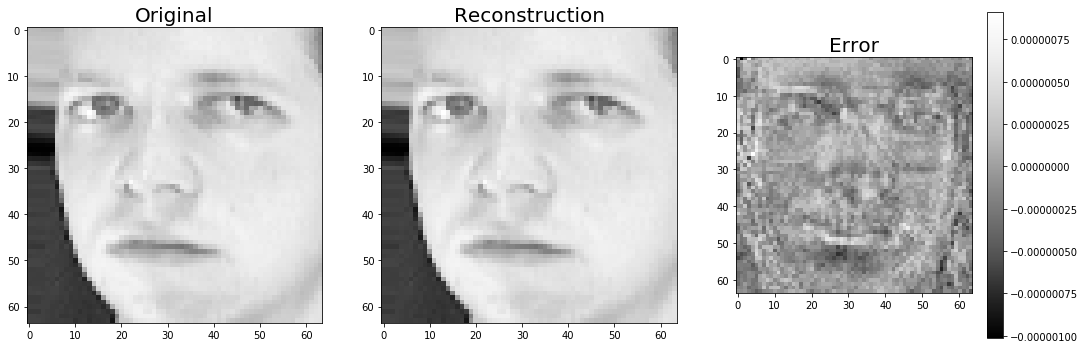

In [28]:
from sklearn.metrics import mean_squared_error
n_components = [50, 100, 200, 300, 500, 700]
FACE_ID = 5
for components in n_components:
    model = PCA(n_components=components)
    model.fit(X)
    embedding = model.transform(X)
    reconstruction = model.inverse_transform(embedding)
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow((X)[FACE_ID].reshape(64, 64), cmap=plt.cm.Greys_r)
    plt.title('Original', fontsize=20)
    plt.subplot(1, 3, 2)
    plt.imshow((reconstruction)[FACE_ID].reshape(64, 64), cmap=plt.cm.Greys_r)
    plt.title('Reconstruction', fontsize=20)
    plt.subplot(1, 3, 3)
    plt.imshow((reconstruction - X)[FACE_ID].reshape(64, 64), cmap=plt.cm.Greys_r)
    plt.colorbar()
    plt.title('Error', fontsize=20)
    print("Number of components {0}. RMSE: {1}".format(components, np.sqrt(mean_squared_error(reconstruction, X))))
    plt.show()

Начиная с 300 компонент пропадает артефакт очков и визуально изображения выглядят похоже.

<i>1.4 Отобразите данные на плоскости (количество компонент = 2). Выделились ли какие-нибудь кластеры? Если да, чему они соответствуют?</i>

In [29]:
model = PCA(n_components=2)
model.fit(X)
embedding = model.transform(X)
reconstruction = model.inverse_transform(embedding)

In [30]:
def plot_dataset(X, emb, margin=50, frame=2000., imsize=64):
    assert(emb.shape[1] == 2)
    emb = np.array((emb - emb.min(0)) * (frame / (emb.max(0) - emb.min(0))) + margin, dtype = np.int)
    image = np.zeros((int(emb[:, 0].max() + margin + imsize), int(emb[:, 1].max() + margin + imsize))) + 1
    for k in range(X.shape[0]):
        image[emb[k, 0]:emb[k, 0]+64, emb[k, 1]:emb[k, 1]+64] = X[k].reshape(64, 64)
    plt.figure(figsize=(20, 20))
    plt.imshow(image, cmap="Greys_r")
    plt.axis("off")
    plt.show()

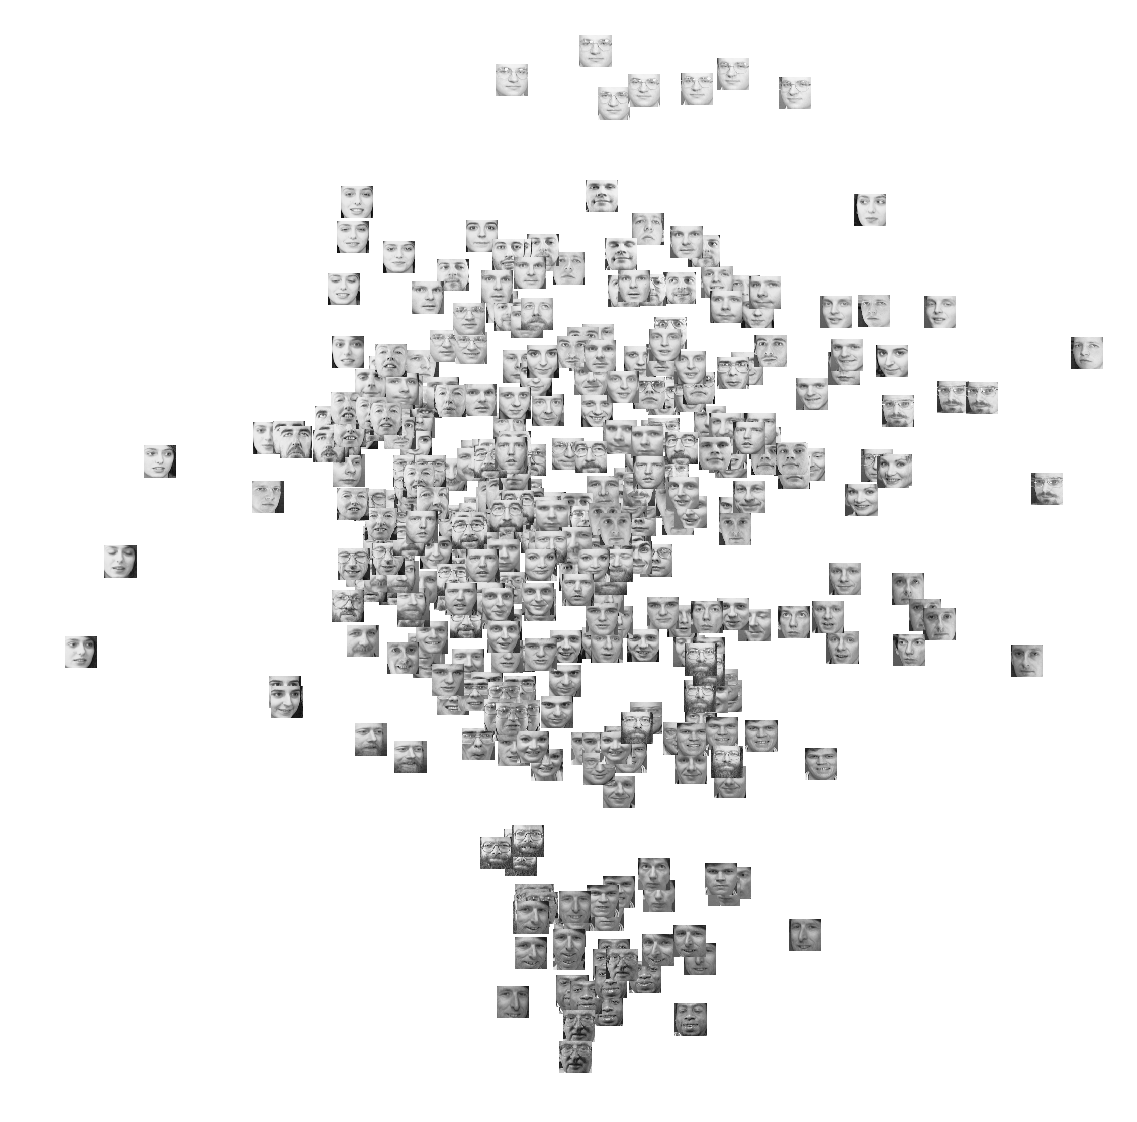

In [31]:
plot_dataset(X, embedding)

Первая компонента — освещение, вторая — в какую сторону смотрит человек

###  Часть 2: Автокодировщик

<i> 2.1 Обучите автокодировщик с архитектурой 4096 -> 200 -> 10 -> 200 -> 4096. В качестве нелинейностей используйте сигмоиду.</i>

In [52]:
from torch.utils.data import DataLoader, Dataset

In [53]:
dataloader = DataLoader(X, batch_size=400, shuffle=True)

In [54]:
def fully_connected(arc, last_nonlinearity=True):
    layers = []
    for i in range(len(arc)-1):
        layers.append(nn.Linear(arc[i], arc[i+1]))
        if i != len(arc)-2 or last_nonlinearity:
            layers.append(nn.Sigmoid())
    return nn.Sequential(*layers)

In [55]:
fully_connected([4096, 200, 10], last_nonlinearity=False)

Sequential(
  (0): Linear(in_features=4096, out_features=200, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=200, out_features=10, bias=True)
)

In [56]:
class AE(nn.Module):
    def __init__(self, arc_encoder, arc_decoder):
        super(AE, self).__init__()
        # create encoder:
        self.encoder = fully_connected(arc_encoder, last_nonlinearity=False)
        self.decoder = fully_connected(arc_decoder, last_nonlinearity=False)
        
    def forward(self, X):
        return self.decoder(self.encoder(X))

In [57]:
model = AE([4096, 200], [200, 4096])

In [58]:
model

AE(
  (encoder): Sequential(
    (0): Linear(in_features=4096, out_features=200, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=200, out_features=4096, bias=True)
  )
)

In [59]:
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [60]:
import sys

In [72]:
for epoch in range(200):
    losses = []
    for x in dataloader:
        x_batch = Variable(x)
        y_batch = Variable(x, requires_grad=False)
        model.zero_grad()
        x_reconstruction = model(x_batch)
        loss_batch = loss(x_reconstruction, y_batch)
        loss_batch.backward()
        optimizer.step()
        losses.append(loss_batch.data.item())
    sys.stdout.write('\r {}'.format(np.mean(losses)))

 0.013723534531891346

In [73]:
embedding = model.encoder(Variable(torch.Tensor(X))).data.numpy()

In [74]:
reconstruction = model(Variable(torch.Tensor(X))).data.numpy()

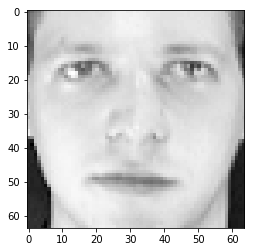

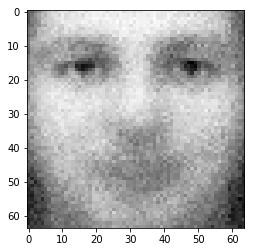

In [75]:
plt.imshow(X[0].reshape(64, 64), cmap=plt.cm.Greys_r)
plt.show()
plt.imshow(reconstruction[0].reshape(64, 64), cmap=plt.cm.Greys_r)

<i> 2.2 Какое качество восстановления удалось получить?</i>

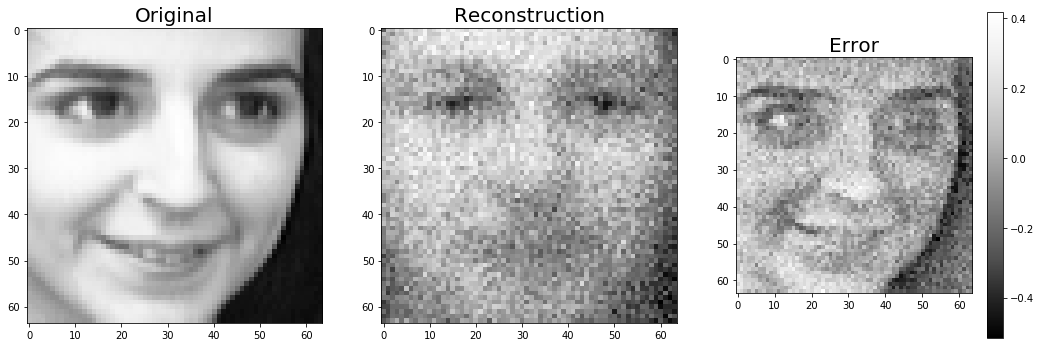

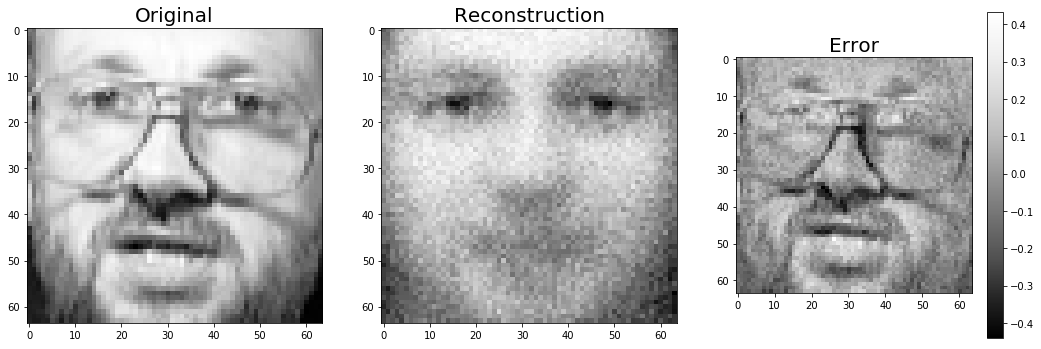

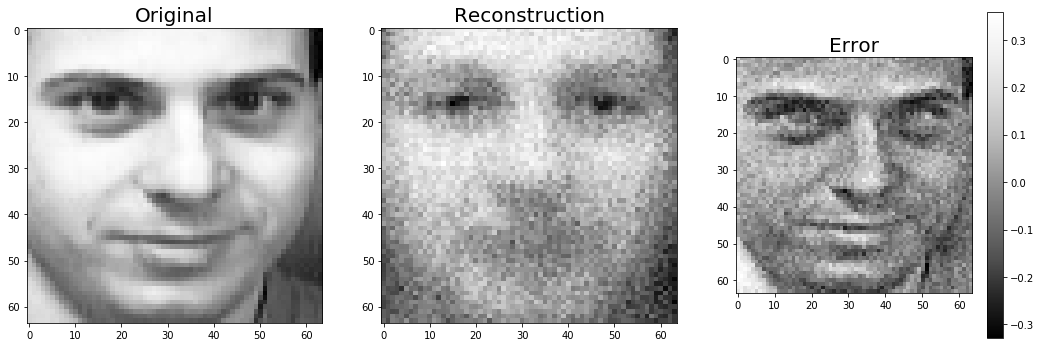

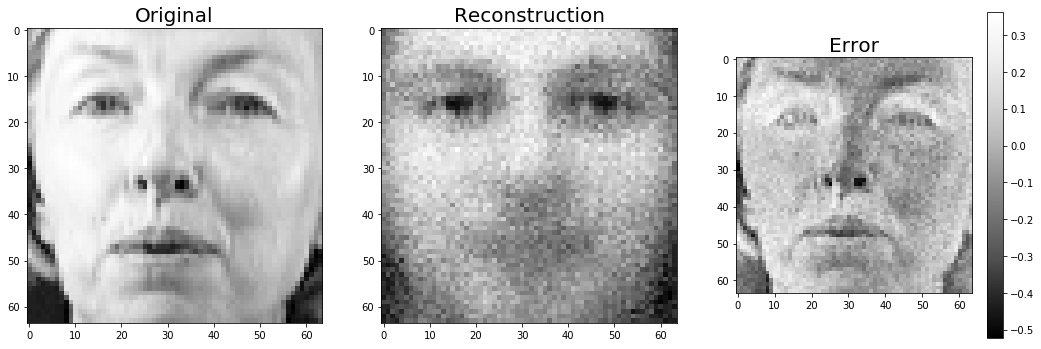

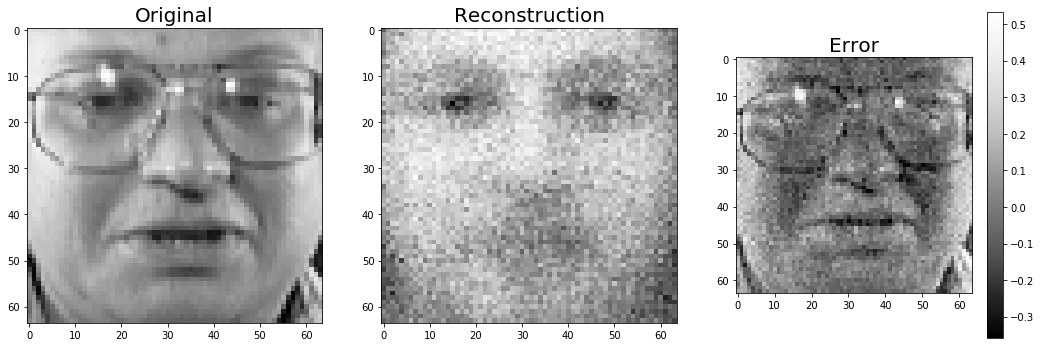

In [82]:
from sklearn.metrics import mean_squared_error
random_faces = np.random.randint(0, X.shape[0], 5)
reconstructions = model(Variable(torch.Tensor(X))).data.numpy()
for face_id in random_faces:
    orig_face = X[face_id]
    rec_face = reconstructions[face_id]
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(orig_face.reshape(64, 64), cmap=plt.cm.Greys_r)
    plt.title('Original', fontsize=20)
    plt.subplot(1, 3, 2)
    plt.imshow(rec_face.reshape(64, 64), cmap=plt.cm.Greys_r)
    plt.title('Reconstruction', fontsize=20)
    plt.subplot(1, 3, 3)
    plt.imshow((orig_face - rec_face).reshape(64, 64), cmap=plt.cm.Greys_r)
    plt.colorbar()
    plt.title('Error', fontsize=20)
    plt.show()

In [95]:
pca = PCA(n_components=300)
pca.fit(X)
pca_embedding = pca.transform(X)
pca_reconstruction = pca.inverse_transform(pca_embedding)
pca_rmse = np.sqrt(mean_squared_error(X, pca_reconstruction))

ae_rmse = np.sqrt(mean_squared_error(X, reconstructions))
print("RMSE autoencoder: {0:.2f}, PCA: {1:.2f}".format(ae_rmse, pca_rmse))

RMSE autoencoder: 0.14, PCA: 0.01


Качество восстановления получилось довольно плохое по сравнению с PCA. Удалось восстановить только фактуру лица, без какой-либо детализации.

<i> 2.3 Обучите сеть с разными размерностями пространства, в которое происходит отображение </i>

In [156]:
bottleneck_sizes = [64, 128, 256, 512, 1024, 2048]
ITER_NUM = 5000
LOSSES = np.empty((len(bottleneck_sizes), ITER_NUM))
models = []
for i, bn_size in enumerate(bottleneck_sizes):
    ae_neurons = [4096, bn_size]
    model = AE(ae_neurons, list(reversed(ae_neurons))).cuda()
    loss = nn.MSELoss().cuda()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    print("Current bottleneck: {0}".format(bn_size))
    for epoch in range(ITER_NUM):
        losses = []
        for x in dataloader:
            x_batch = Variable(x).cuda()
            y_batch = Variable(x, requires_grad=False).cuda()
            model.zero_grad()
            x_reconstruction = model(x_batch)
            loss_batch = loss(x_reconstruction, y_batch)
            loss_batch.backward()
            optimizer.step()
            losses.append(loss_batch.data.item())
        if (epoch+1) % 500 == 0: print("Epoch: {0}. Loss: {1}".format(epoch+1, np.mean(losses)))
        LOSSES[i][epoch] = np.mean(losses)
        #sys.stdout.write('\r {}'.format(np.mean(losses)))
    models.append(model)

Current bottleneck: 64
Epoch: 200. Loss: 0.015270650386810303
Epoch: 400. Loss: 0.014858508482575417
Epoch: 600. Loss: 0.013820872642099857
Epoch: 800. Loss: 0.01213270053267479
Epoch: 1000. Loss: 0.011038537137210369
Epoch: 1200. Loss: 0.011340959928929806
Epoch: 1400. Loss: 0.011011694557964802
Epoch: 1600. Loss: 0.013520116917788982
Epoch: 1800. Loss: 0.008814824745059013
Epoch: 2000. Loss: 0.008927582763135433
Epoch: 2200. Loss: 0.008577074855566025
Epoch: 2400. Loss: 0.006960248574614525
Epoch: 2600. Loss: 0.007589458953589201
Epoch: 2800. Loss: 0.006704228464514017
Epoch: 3000. Loss: 0.006568766199052334
Epoch: 3200. Loss: 0.0057987915351986885
Epoch: 3400. Loss: 0.00570799270644784
Epoch: 3600. Loss: 0.005647263489663601
Epoch: 3800. Loss: 0.006248204503208399
Epoch: 4000. Loss: 0.004764834884554148
Epoch: 4200. Loss: 0.004639467690140009
Epoch: 4400. Loss: 0.004665536805987358
Epoch: 4600. Loss: 0.004530006088316441
Epoch: 4800. Loss: 0.00477858679369092
Epoch: 5000. Loss: 0.00

Bottleneck size: 64, MSE: 0.006807580124586821


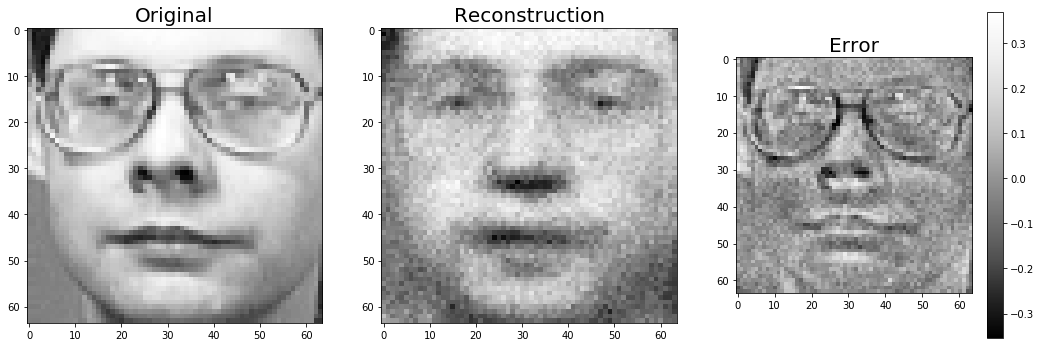

Bottleneck size: 128, MSE: 0.004227816127240658


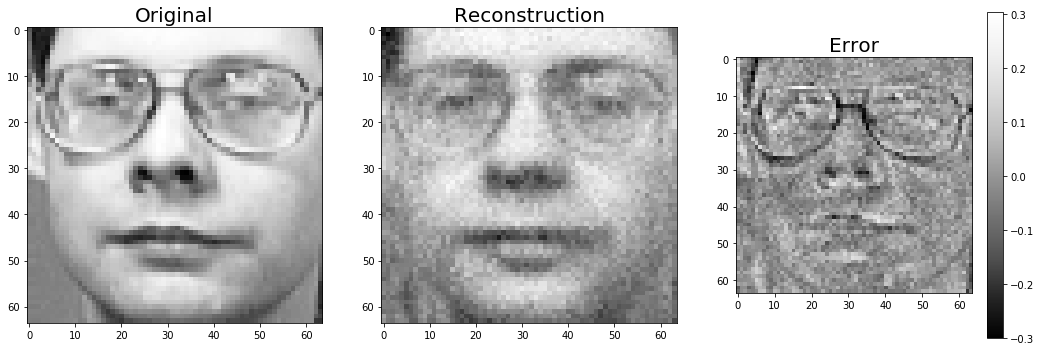

Bottleneck size: 256, MSE: 0.0023719046730548143


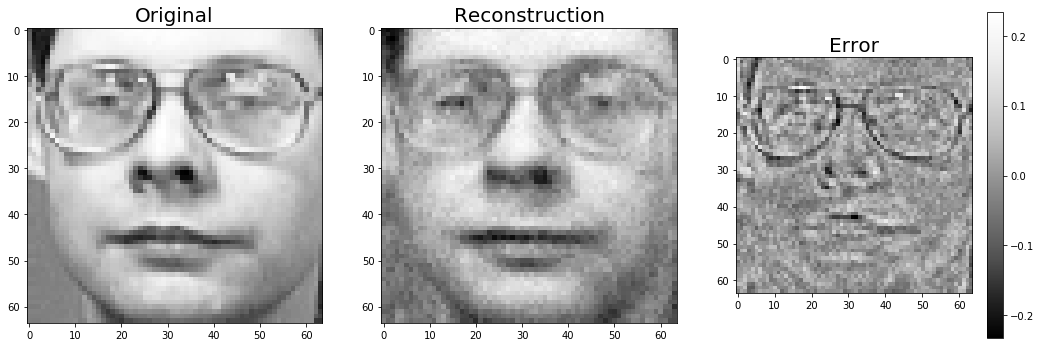

Bottleneck size: 512, MSE: 0.0029327853117138147


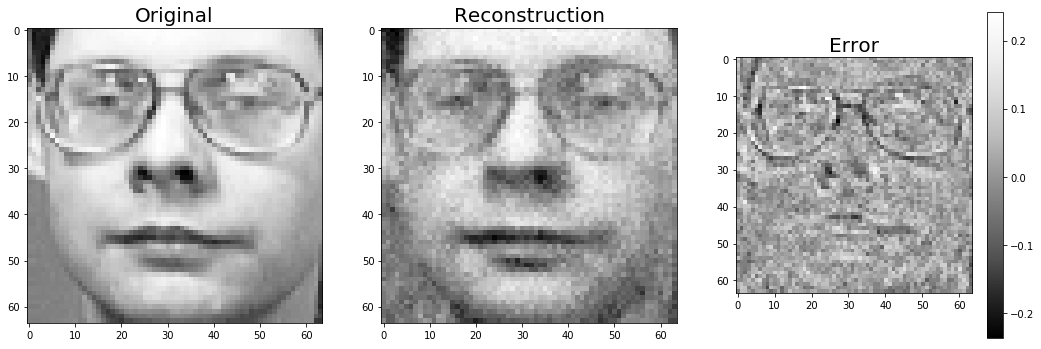

Bottleneck size: 1024, MSE: 0.0024100777227431536


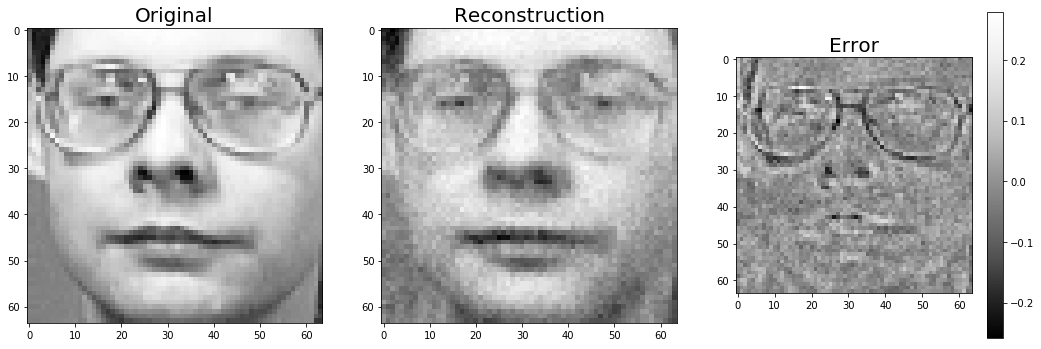

Bottleneck size: 2048, MSE: 0.002407412277534604


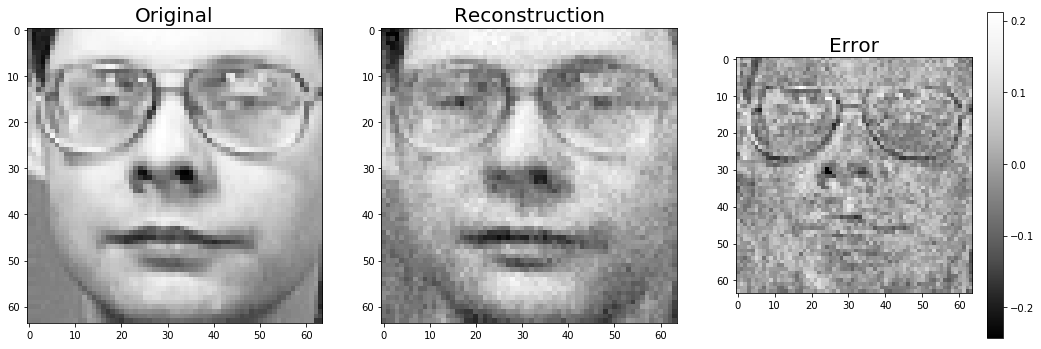

<i> 2.4 Сравните графики из пунктов 1.2 и 2.3 </i>

In [270]:
from sklearn.metrics import explained_variance_score

In [271]:
torch.cuda.set_device(3)

In [289]:
bottleneck_sizes = list(range(2, 400+1, 40)) + [400]
ITER_NUM = 1000
evrs = np.empty((len(bottleneck_sizes), 1))
models = []
for i, bn_size in enumerate(bottleneck_sizes):
    ae_neurons = [4096, bn_size]
    model = AE(ae_neurons, list(reversed(ae_neurons))).cuda()
    loss = nn.MSELoss().cuda()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(ITER_NUM):
        losses = []
        for x in dataloader:
            x_batch = Variable(x).cuda()
            y_batch = Variable(x, requires_grad=False).cuda()
            model.zero_grad()
            x_reconstruction = model(x_batch)
            loss_batch = loss(x_reconstruction, y_batch)
            loss_batch.backward()
            optimizer.step()
            losses.append(loss_batch.data.item())

        #LOSSES[i][epoch] = np.mean(losses)
    recons = model(Variable(torch.cuda.FloatTensor(X))).cpu().data.numpy()
    evrs[i] = explained_variance_score(X, recons)
    print("Cur bottleneck size: {0}, EVR: {1}".format(bn_size, evrs[i]))
    models.append(model)

Cur bottleneck size: 2, EVR: [0.38836654]
Cur bottleneck size: 42, EVR: [0.83956086]
Cur bottleneck size: 82, EVR: [0.88073794]
Cur bottleneck size: 122, EVR: [0.89885724]
Cur bottleneck size: 162, EVR: [0.93537456]
Cur bottleneck size: 202, EVR: [0.94091646]
Cur bottleneck size: 242, EVR: [0.9290689]
Cur bottleneck size: 282, EVR: [0.87681471]
Cur bottleneck size: 322, EVR: [0.95081003]
Cur bottleneck size: 362, EVR: [0.95406172]
Cur bottleneck size: 400, EVR: [0.95407239]


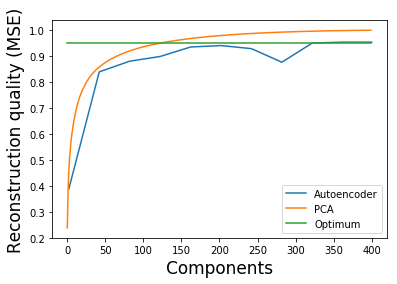

In [290]:
pca = PCA()
pca.fit(X)
plt.plot(bottleneck_sizes, evrs, label='Autoencoder')
plt.plot(np.cumsum(pca.explained_variance_ratio_), label="PCA")
plt.xlabel('Components', fontsize=17)
plt.ylabel('Reconstruction quality (MSE)', fontsize=17)
plt.plot(range(400), [0.95]*400, label='Optimum')
plt.legend()

Для заданной архитектуры автокодировщик (4096 -> n_components -> 4096) без нелинейности достигает 95% EVR с 300 нейронов в латентном слое, при этом PCA достигает этого значения, начиная со 120 компонент. При правильном подборе архитектуры и регуляризации при большом количестве эпох AE дает 100% EVR начиная с 2-х в латентном слое.

<i> 2.5 Отобразите данные на плоскости (количество компонент = 2). Выделились ли какие-нибудь кластеры? Если да, чему они соответствуют?</i>

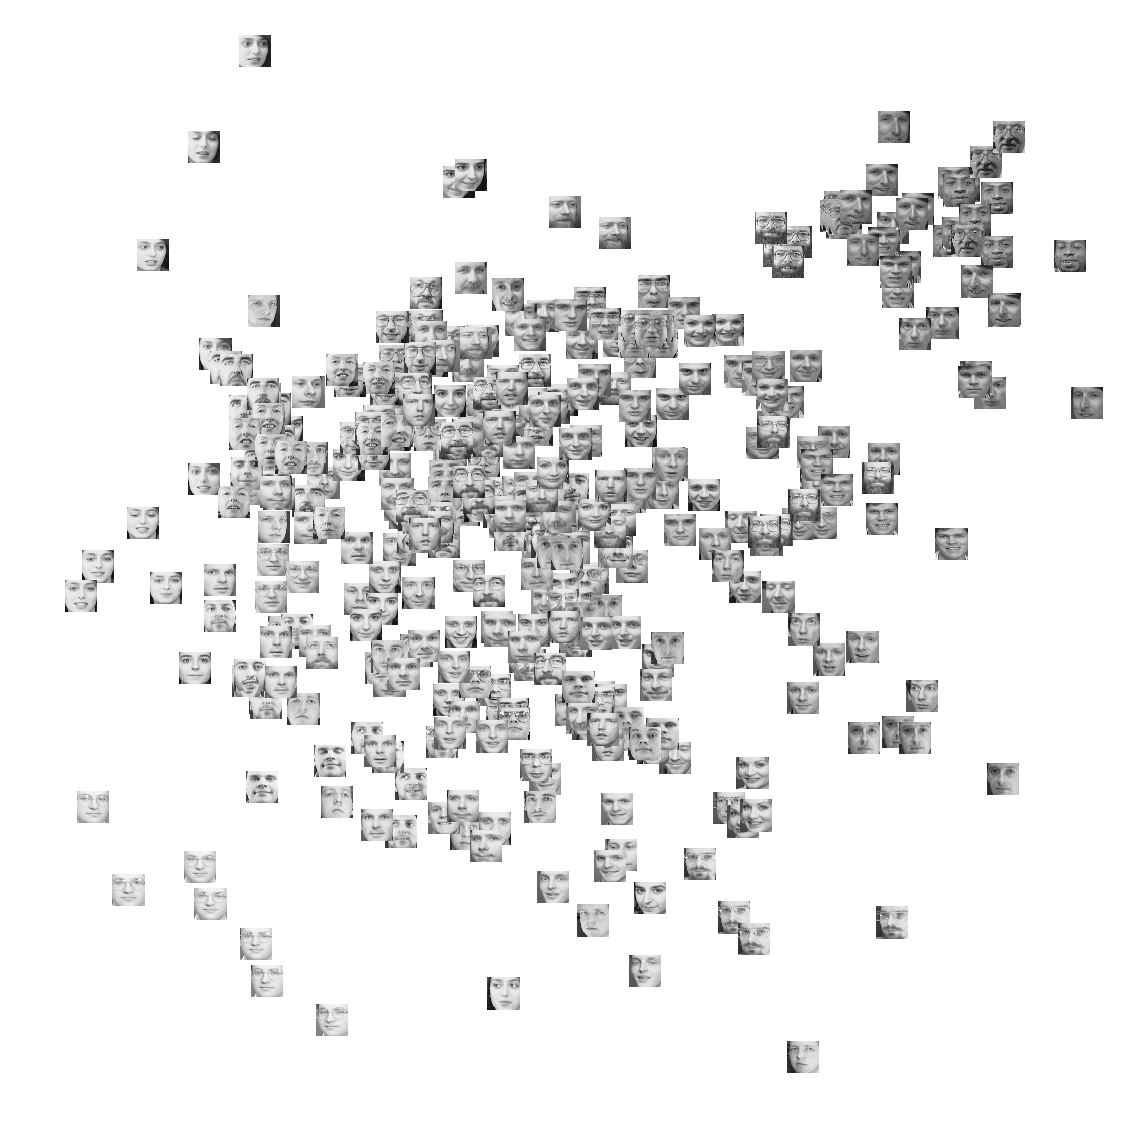

In [291]:
rec = models[0].encoder(Variable(torch.cuda.FloatTensor(X))).cpu().data.numpy()
plot_dataset(X, rec)

Выделились кластера по интенсивности света, а также состоящих из фотографий лиц определенного человека.

#### Feedback (опционально)

Здесь вы можете оставить список опечаток из лекции или семинара:

Здесь вы можете оставить комментарии по лекции или семинару: